<a href="https://colab.research.google.com/github/juanepstein99/DI_Bootcamp/blob/main/Week9/Day3%264/DailyChallenge.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Daily Challenge: Mastering Data Visualization**


**Your Task : Create a comprehensive visual analysis of the car sales dataset using different plotting libraries.**

Dataset Columns:

* Price: Sale price of the vehicle
* Years: Vehicle registration year
* Brand: Car brand
* Model: Car model
* Color: Vehicle color
* State/City: Sale location
* Mileage: Miles traveled
* Vin: Vehicle identification number
* Title Status: Clean title or salvage insurance
* Lot: Lot number
* Condition: Vehicle condition
* Create a histogram showing the distribution of car prices.
* Create a box plot showing price distribution by brand (top 10 brands).
* Create an interactive scatter plot of Price vs. Mileage, color-coded by Condition.
* Optional : create a heatmap of average prices by brand and condition.


In [1]:
# Importing libraries
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import plotly.express as px

# Loading data
file_path = "USA_cars_datasets.csv"
df = pd.read_csv(file_path)

# Quick check of the dataset
print(df.shape)
print(df.columns)
display(df.head())

(2499, 13)
Index(['Unnamed: 0', 'price', 'brand', 'model', 'year', 'title_status',
       'mileage', 'color', 'vin', 'lot', 'state', 'country', 'condition'],
      dtype='object')


,Unnamed: 0,price,brand,model,year,title_status,mileage,color,vin,lot,state,country,condition
0,0,6300,toyota,cruiser,2008,clean vehicle,274117.0,black,jtezu11f88k007763,159348797,new jersey,usa,10 days left
1,1,2899,ford,se,2011,clean vehicle,190552.0,silver,2fmdk3gc4bbb02217,166951262,tennessee,usa,6 days left
2,2,5350,dodge,mpv,2018,clean vehicle,39590.0,silver,3c4pdcgg5jt346413,167655728,georgia,usa,2 days left
3,3,25000,ford,door,2014,clean vehicle,64146.0,blue,1ftfw1et4efc23745,167753855,virginia,usa,22 hours left
4,4,27700,chevrolet,1500,2018,clean vehicle,6654.0,red,3gcpcrec2jg473991,167763266,florida,usa,22 hours left


In [2]:
# STANDARDIZE COLUMNS (to avoid KeyErrors)

# Normalize column names: lowercase + underscores
df.columns = (
    df.columns
      .str.strip()
      .str.lower()
      .str.replace(" ", "_")
      .str.replace("/", "_")
)

print("\nNormalized columns:")
print(df.columns)

# Helper: find the first matching column among options
def pick_col(options):
    for c in options:
        if c in df.columns:
            return c
    return None

price_col = pick_col(["price"])
year_col = pick_col(["years", "year"])
brand_col = pick_col(["brand", "make"])
model_col = pick_col(["model"])
color_col = pick_col(["color"])
location_col = pick_col(["state_city", "state", "city"])
mileage_col = pick_col(["mileage", "miles", "odometer"])
vin_col = pick_col(["vin"])
title_col = pick_col(["title_status", "title"])
lot_col = pick_col(["lot"])
condition_col = pick_col(["condition"])

print("\nDetected columns:")
print("price:", price_col)
print("brand:", brand_col)
print("mileage:", mileage_col)
print("condition:", condition_col)


Normalized columns:
Index(['unnamed:_0', 'price', 'brand', 'model', 'year', 'title_status',
       'mileage', 'color', 'vin', 'lot', 'state', 'country', 'condition'],
      dtype='object')

Detected columns:
price: price
brand: brand
mileage: mileage
condition: condition


In [3]:
# BASIC CLEANING

# Convert numeric columns
if price_col:
    df[price_col] = pd.to_numeric(df[price_col], errors="coerce")

if mileage_col:
    df[mileage_col] = pd.to_numeric(df[mileage_col], errors="coerce")

# Drop rows that we need for charts
needed = [c for c in [price_col, brand_col, mileage_col, condition_col] if c is not None]
df_clean = df.dropna(subset=needed).copy()

# Remove impossible values (optional but safe)
if price_col:
    df_clean = df_clean[df_clean[price_col] > 0]

if mileage_col:
    df_clean = df_clean[df_clean[mileage_col] >= 0]

print("\nAfter cleaning:", df_clean.shape)


After cleaning: (2456, 13)


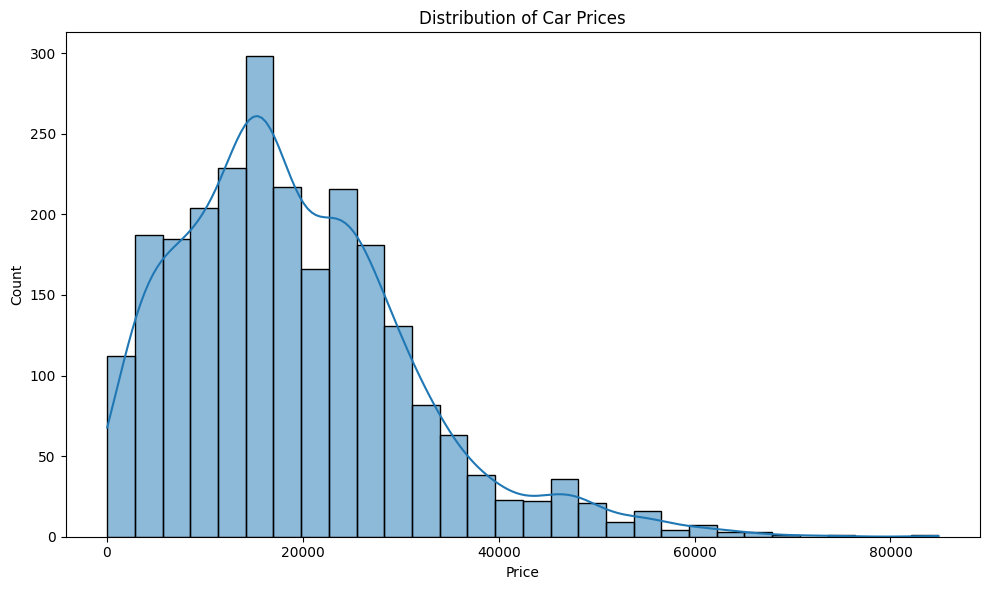

In [4]:
# HISTOGRAM: PRICE DISTRIBUTION

plt.figure(figsize=(10, 6))
sns.histplot(data=df_clean, x=price_col, bins=30, kde=True)
plt.title("Distribution of Car Prices")
plt.xlabel("Price")
plt.ylabel("Count")
plt.tight_layout()
plt.show()

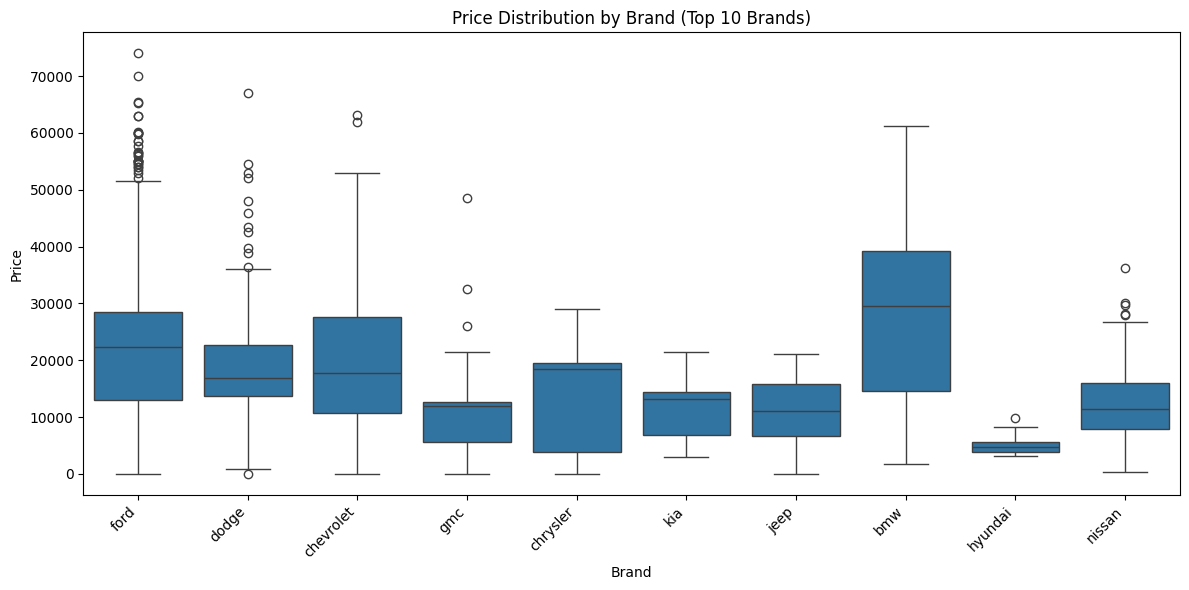

In [5]:
# BOX PLOT: PRICE BY BRAND (TOP 10)

top10_brands = df_clean[brand_col].value_counts().head(10).index
df_top10 = df_clean[df_clean[brand_col].isin(top10_brands)].copy()

plt.figure(figsize=(12, 6))
sns.boxplot(data=df_top10, x=brand_col, y=price_col)
plt.title("Price Distribution by Brand (Top 10 Brands)")
plt.xlabel("Brand")
plt.ylabel("Price")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()

In [6]:
# INTERACTIVE SCATTER (PLOTLY)
# Price vs Mileage, colored by Condition

fig = px.scatter(
    df_clean,
    x=mileage_col,
    y=price_col,
    color=condition_col if condition_col else None,
    hover_data=[brand_col, model_col] if brand_col and model_col else None,
    title="Price vs Mileage (colored by Condition)",
)
fig.show()

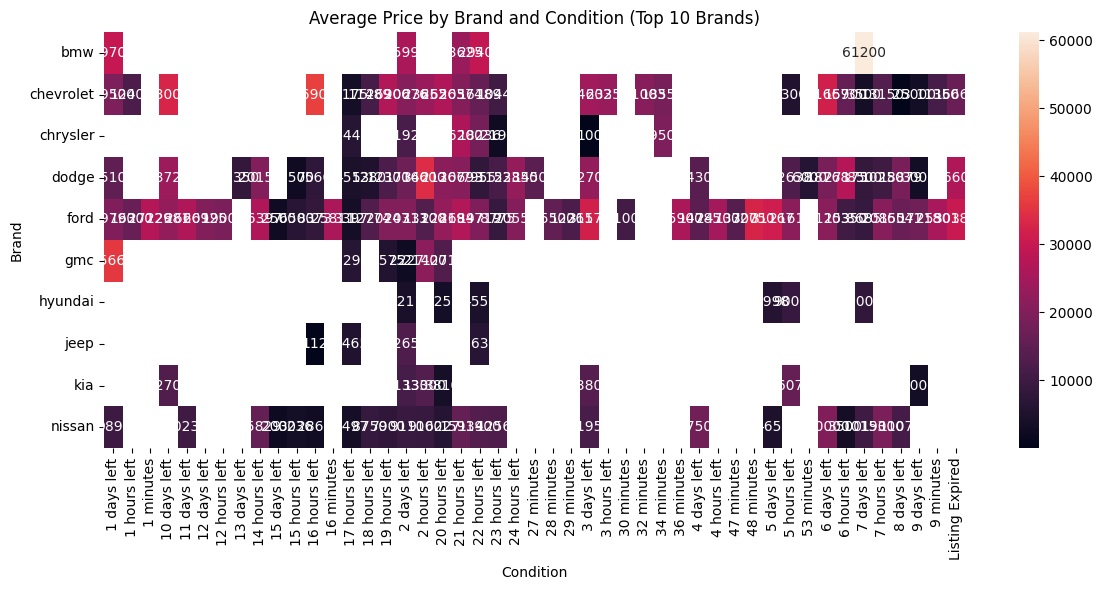

In [7]:
# HEATMAP (average price by brand and condition)

if brand_col and condition_col and price_col:
    # Keep it readable: use top 10 brands again
    heat_data = df_clean[df_clean[brand_col].isin(top10_brands)].copy()

    pivot = heat_data.pivot_table(
        index=brand_col,
        columns=condition_col,
        values=price_col,
        aggfunc="mean"
    )

    plt.figure(figsize=(12, 6))
    sns.heatmap(pivot, annot=True, fmt=".0f")
    plt.title("Average Price by Brand and Condition (Top 10 Brands)")
    plt.xlabel("Condition")
    plt.ylabel("Brand")
    plt.tight_layout()
    plt.show()
else:
    print("\nHeatmap skipped: missing one of [brand, condition, price] columns.")